# ALGORITMOS DE ORDENAÇÃO $ N \cdot LOG ~N $

### Proposta:

- Utilizou-se os algoritmos $n \cdot log ~n$ **`quick sort`, `merge sort` e `bucket sort` aplicados em um `dataset`** (arquivo "athlete_events.csv") dos resultados e partipação de atletas nos jogos olímpicos.
- O arquivo **csv** proposto possui o registro de **134732 atletas**. Para o dado problema, utilizou-se todos os registros dos atletas filtrando os campos de interesse — nome, sexo, time, NOC, jogos, cidade e evento.
- Também utilizou-se um dataset (arquivo "noc_regions.csv") dos países participantes.
- O objetivo do **`notebook`** é **apresentar informações dos jogos olímpicos**, como o número de atletas participantes por edição e do número de participação de cada país, e utilizar os algoritmos de ordenação para ordenar os atletas por nome e, ao final, **gerar metodos de busca e apresentar os resutados encontrados em uma tabela**.
- É representado também a **comparação gráfica (histograma)** dos algoritmos de ordenação aplicado a todos atletas, assim como a **comparação gráfica (`Violin`)** dos algoritmos de ordenação aplicados a vetores de diferentes tamanhos com atletas aleatórios.

### Alunos:

- Welison Lucas Almeida Regis - 2019.1,
- Lieverton Santos Silva - 2019.1.

# IMPORTS

In [1]:
import pandas as pd
import random
import time
import plotly.graph_objs as go

from matplotlib import pyplot as plt
from itertools import chain
from ipywidgets import IntProgress

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# OLYMPIC ATHLETE CLASS

In [2]:
class Athlete:
    
    def __init__(self, name, sex, team, NOC, games, city, event, medal):
        self.name = name
        self.sex = sex
        self.team = team
        self.NOC = NOC
        self.games = games
        self.city = city
        self.event = event
        self.medal = medal

# READ ATHLETES FROM CSV

In [3]:
def read_csv(filename = './assets/athlete_events.csv'): 
    """Method to read specific soccer informations from csv file
    
    attributes:
        filename: path to csv file with athletes data.
    """
    
    print(">>>>>> LOADING <<<<<<")
    
    df = pd.read_csv(filename, usecols=['Name', 'Sex', 'Team', 'NOC', 'Games', 'City', 'Event', 'Medal'])
    
    athletes = athletes_objects(df)
        
    print(">>> LOADING SUCCESS! <<<")
        
    return athletes

In [4]:
def athletes_objects(athletes_df):
    athletes = []
    for index, row in athletes_df.iterrows():
        name = row['Name'].strip().title()
        sex = row['Sex']
        team = row['Team']
        NOC = row['NOC']
        games = row['Games']
        city = row['City']
        event = row['Event']
        medal = row['Medal']
        
        athlete = Athlete(name, sex, team, NOC, games, city, event, medal)
        athletes.append(athlete)
    
    return athletes

In [5]:
# LIST OF ATHLETES OBJECTS
ATHLETES = read_csv()

>>>>>> LOADING <<<<<<
>>> LOADING SUCCESS! <<<


# DATASET EXAMPLE

In [6]:
def generate_random_athletes(athletes, n = 5):
    
    random_athletes = []
    for i in range(n):
        athlete = random.choices(athletes)
        random_athletes.append(athlete)
    
    return random_athletes

In [7]:
def athletes_info(athletes):
    if athletes:
        if athletes == "Not found!":
            print(athletes)
        else:
            athletes_table = []
            for athlete in athletes:
                athlete = athlete[0].__dict__.values()
                athletes_table.append(athlete)

            df = pd.DataFrame(
                athletes_table,
                columns=['Nome', 'Sexo', 'Time', 'NOC', 'Jogos', 'Cidade', 'Evento', 'Medalha']
            )

            return df

In [8]:
athletes = generate_random_athletes(ATHLETES.copy())
athletes_info(athletes)

,Nome,Sexo,Time,NOC,Jogos,Cidade,Evento,Medalha
0,"Matthew Ward ""Matt"" Wells",M,Great Britain,GBR,2000 Summer,Sydney,Rowing Men's Single Sculls,NaN
1,V'Iacheslav Mykolaiovych Oliynyk,M,Ukraine,UKR,1996 Summer,Atlanta,"Wrestling Men's Light-Heavyweight, Greco-Roman",Gold
2,James Lurane Williams,M,Great Britain,GBR,1992 Summer,Barcelona,"Fencing Men's Sabre, Team",NaN
3,Matthias Behr,M,West Germany,FRG,1988 Summer,Seoul,"Fencing Men's Foil, Individual",NaN
4,Martin Edward Reynolds,M,Great Britain,GBR,1972 Summer,Munich,Athletics Men's 400 metres,NaN


# VISUALIZING DATA WITH PANDAS AND PLOTLY

In [9]:
ATHLETE_EVENTS_CSV = pd.read_csv('./assets/athlete_events.csv')
NOC_REGIONS_CSV = pd.read_csv('./assets/noc_regions.csv')

### Count number of competitors per olympic

In [10]:
def plot_summer_winter_athletes(olympics_df):
    summer_df = olympics_df[olympics_df['Season'] == 'Summer']
    winter_df = olympics_df[olympics_df['Season'] == 'Winter']

    summer = go.Scatter(
        x = summer_df['Year'],
        y = summer_df['Athletes'],
        name="Jogos de Verão",
        marker=dict(color="Green"),
        mode = "markers+lines"
    )
    winter = go.Scatter(
        x = winter_df['Year'],
        y = winter_df['Athletes'],
        name="Jogos de Inverno",
        marker=dict(color="Red"),
        mode = "markers+lines"
    )

    data = [summer, winter]
    layout = dict(title = 'Competidores por Olimpíadas',
              xaxis = dict(title = 'Ano', showticklabels=True), 
              yaxis = dict(title = 'Número de Competidores'),
              hovermode = 'closest'
             )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='olympic_athletes')

In [11]:
olympic_athletes = ATHLETE_EVENTS_CSV.groupby('Year')['Season'].value_counts()

olympics_df = pd.DataFrame(
    data = {'Athletes': olympic_athletes.values},
    index = olympic_athletes.index
).reset_index()


plot_summer_winter_athletes(olympics_df)

# OLYMPIC GAMES - COUNTRY'S PARTICIPATION

### Draw 3D map with countries partition

In [12]:
def draw_map(dataset, title, colorscale, map_type = 'orthographic'):
    trace = go.Choropleth(
                locations = dataset['Country'],
                locationmode = 'country names',
                z = dataset['Editions'],
                text = dataset['Country'],
                autocolorscale = False,
                reversescale = False,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Edições',
                    tickprefix = '')
            )

    data = [trace]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = map_type
            )
        )
    )
    
    fig = dict( data=data, layout=layout)
    iplot(fig)

### Merge athletes with regions datasets

In [13]:
olympics_df = ATHLETE_EVENTS_CSV.merge(NOC_REGIONS_CSV)
olympics_df = olympics_df.rename(columns = {'region':'Country'})

countries_participations = olympics_df.groupby(['Country', 'Season'])['Year'].nunique()

olympic_editions = pd.DataFrame(
    data={'Editions': countries_participations.values},
    index=countries_participations.index
).reset_index()

## Participation per country in summer editions

In [14]:
summer = olympic_editions['Season'] == 'Summer'
summer_editions = olympic_editions[summer]

draw_map(summer_editions, 'PARTICIPAÇÃO MUNDIAL NOS JOGOS OLÍMPICOS DE VERÃO', "Reds")

## Participation per country in winter editions

In [15]:
winter = olympic_editions['Season'] == 'Winter'
winter_editions = olympic_editions[winter]

draw_map(winter_editions, 'PARTICIPAÇÃO MUNDIAL NOS JOGOS OLÍMPICOS DE INVERNO', "Blues", 'equirectangular')

## BUCKET SORT

In [16]:
def bucket_sort(athletes):
    """Implement bucket sort algorithm
    
    Attributes:
        athletes: list with all olympic athletes.
    """
    
    length = int(len(athletes))
 
    buckets = [[] for _ in range(26)]
    for i in range(length):
        bucket = int(ord(athletes[i].name[0])) - 65
        if bucket >= 0 and bucket < 26 :
            buckets[bucket].append(athletes[i])
 
    return buckets

In [17]:
def bucket_quick_sort(athletes):
    
    buckets = bucket_sort(athletes)
    
    for i in range(len(buckets)):
        quick_sort(buckets[i])

    return list(chain(*buckets))

In [18]:
def bucket_merge_sort(athletes):
    
    buckets = bucket_sort(athletes)
    
    for i in range(len(buckets)):
        merge_sort(buckets[i])

    return list(chain(*buckets))

In [19]:
def show_buckets(len_buckets):
    
    plt.grid(which='major', axis='y', color='green', linewidth=0.3)
    plt.bar([i for i in range(1,27)], height=len_buckets) 
    plt.xticks([i for i in range(1,27)], [chr(i) for i in range(65,91)])
    plt.xlabel('buckets')
    plt.ylabel('athletes')
    
    plt.plot()

In [20]:
def length_bucket(buckets):
    len_buckets = []
    for i in range(len(buckets)):
        len_buckets.append(len(buckets[i]))
    
    show_buckets(len_buckets)

### BUCKET SPLIT

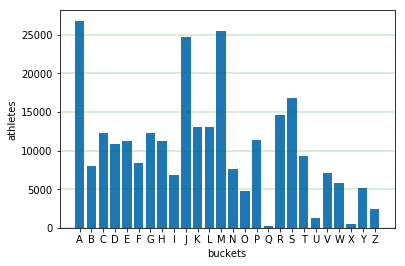

In [21]:
bucket = bucket_sort(ATHLETES.copy())
length_bucket(bucket)

## QUICK SORT

In [22]:
def partition(athletes, low, high): 
    i = ( low-1 )        
    pivot = athletes[high]      
  
    for j in range(low , high): 
        if athletes[j].name <= pivot.name: 
            i += 1 
            athletes[i], athletes[j] = athletes[j], athletes[i] 
  
    athletes[i+1], athletes[high] = athletes[high], athletes[i+1] 
    return ( i+1 ) 
  
def quick_sort(athletes, low = 0, high = None):
    """Implement quick sort algorithm
    
    Attributes:
        athletes: list with all olympic athletes.
    """
    if high is None:
        high = len(athletes) - 1
    if low < high: 
        pivot = partition(athletes,low,high) 
        quick_sort(athletes, low, pivot - 1) 
        quick_sort(athletes, pivot + 1, high) 
    return athletes

## MERGE SORT

In [23]:
def merge_sort(athletes):
    """Implement merge sort algorithm
    
    Attributes:
        athletes: list with all olympic athletes.
    """
    if(len(athletes) > 1):
        middle = int(len(athletes)/2)

        left = athletes[:middle]
        right = athletes[middle:]

        merge_sort(left)
        merge_sort(right)

        i, j, k = [0, 0, 0]

        while(i < len(left) and j < len(right)):
            if(left[i].name < right[j].name):
                athletes[k] = left[i]
                i += 1
            else:
                athletes[k] = right[j]
                j += 1

            k += 1

        while(i < len(left)):
            athletes[k] = left[i]
            k += 1
            i += 1

        while(j < len(right)):
            athletes[k] = right[j]
            j += 1
            k += 1
    return athletes

# COMPUTE ALGORITHMS TIME COMPLEXITY

In [24]:
def execution_time(athletes, function):
    """Time taken to sort athletes with certain function
    
    Attributes:
        athletes: list with all olympic athletes;
        function: bucket_quick_sort, bucket_merge_sort, quick_sort or merge_sort.
    """
    begin = time.time()
    function(athletes.copy())
    end = time.time()

    time_spend = end - begin
    
    return time_spend

In [25]:
def algorithms_complexity(athletes):
    """Evaluate taken time to four sort algorithms methods
    
    Attributes:
        athletes: list with all olympic athletes;
    """
    print(">>> LOADING <<<: GENERATING GRAPHIC!")
    
    functions = [bucket_quick_sort, bucket_merge_sort, quick_sort, merge_sort]
    
    bar = IntProgress(min=0, max = 4, description='PROGRESS:') # instantiate the bar
    display(bar)
    
    times = []
    for function in functions:
        time_spend = execution_time(athletes.copy(), function)
        times.append(time_spend)
        
        bar.value += 1
    
    return times

## Histogram box plot

In [26]:
def plot_histogram(times):
    """Plot algorithm complexity of four sort algorithms
    
    Attributes:
        times: list with time taken to evaluate bucket, quick and merge algorithms.
    """
    plt.grid(which='major', axis='y', color='green', linewidth=0.3)
    plt.bar([1, 2, 3, 4], height=times) 
    plt.xticks([1, 2, 3, 4], ['bucket_quick','bucket_merge','quick','merge'])
    plt.xlabel('sort method')
    plt.ylabel('seconds')
    
    plt.plot()

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

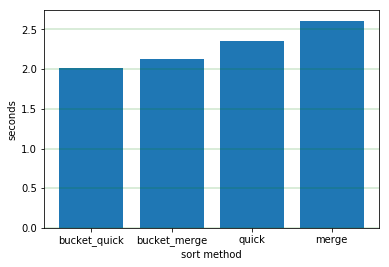

In [27]:
times_unordered = list(algorithms_complexity(ATHLETES.copy()))
plot_histogram(times_unordered)

## Violin box plot

In [28]:
athletes_length = len(ATHLETE_EVENTS_CSV)

random_athletes_samples = []
for i in range(0, athletes_length, 20000):
    random_sample = random.sample(ATHLETES, i)

    random_athletes_samples.append(random_sample)

In [29]:
print('{} vetores com tamanhos variados e atletas randômicos'.format(len(random_athletes_samples)))

times = []
for athlete_sample in random_athletes_samples:
    algorithm_times = algorithms_complexity(athlete_sample)
    times.append(algorithm_times)

14 vetores com tamanhos variados e atletas randômicos
>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

In [30]:
algorithms_times = [
    ['Bucket Quick', list(zip(*times))[0]],
    ['Bucket Merge', list(zip(*times))[1]],
    ['Quick sort', list(zip(*times))[2]],
    ['Merge sort', list(zip(*times))[3]]
]

data = []
for algorithm_times in algorithms_times:
    trace = {
        "type": 'violin',
        "x": algorithm_times[0],
        "y": algorithm_times[1],
        "name": algorithm_times[0],
        "box": {
            "visible": True
        },
        "meanline": {
            "visible": True
        }
    }
    
    data.append(trace)
        
fig = {
    "data": data,
    "layout" : {
        "title": "Violin Box Plot - Algoritmos de ordenação",
        "yaxis": {
            "title": 'seconds',
            "zeroline": False,
        }
    }
}

iplot(fig, filename='violin/multiple', validate = False)

### Binary Search

In [31]:
def generate_athletes(athletes, idx):
    list_athletes = []
    up_limit = 0
    
    for i in range(idx,len(athletes)):
        if athletes[i].name != athletes[idx].name:
            up_limit = i-1
            break

    for i in range(up_limit,0,-1):
        if athletes[i].name != athletes[idx].name:
            break
        athlete = []
        athlete.append(athletes[i])
        list_athletes.append(athlete) 
    
    return list_athletes

In [32]:
def binary_search(athletes, key):
    """Implementation of binary search algorithm
    
    Attributes:
        athletes: list with all olympic athletes;
        key: name of athlete to search.
    """
    
    min_index = 0
    max_index = len(athletes)-1
    
    while (min_index <= max_index):
        middle = min_index + (max_index - min_index)//2
        
        if (athletes[middle].name == key):
            list_athletes = generate_athletes(athletes, middle)
            return list_athletes
        elif (athletes[middle].name < key):
            min_index = middle+1
        else:
            max_index = middle-1
        
    return "Not found!"

### Sequencial Search

In [33]:
def sequencial_search(athletes, key):
    """Perform sequencial search algorithm
    
    Attributes:
        athletes: list with all olympic athletes;
        key: name of athlete to search. 
    """
    
    list_athletes = []
    
    for i in range(len(athletes)):
        if athletes[i].name.count(key):
            athlete = []
            athlete.append(athletes[i])
            list_athletes.append(athlete) 
        
    if list_athletes:
        return list_athletes
    else:
        return "Not found!"

### Search by name

In [34]:
def search_name(athletes):
    name = ''
    while True:
        name = input('> ')

        if not name.strip():
            if input('sair? (S/n) ').lower() in 's':
                break
        else:
            break

    if name.strip():
        athletes = sequencial_search(athletes, name)
        return athletes

### Search by full name

In [35]:
def search_full_name(athletes):
    name = ''
    while True:
        name = input('> ')

        if not name.strip():
            if input('sair? (S/n) ').lower() in 's':
                break
        else:
            break

    if name.strip():
        athletes = binary_search(athletes, name)
        return athletes

In [36]:
athletes_order = bucket_merge_sort(ATHLETES.copy())

#### Digite um nome para pesquisar:

In [37]:
athletes = search_name(athletes_order)
athletes_info(athletes)

> Camilo


,Nome,Sexo,Time,NOC,Jogos,Cidade,Evento,Medalha
0,Alberto Camilo Velzquez Aguilar,M,Uruguay,URU,1960 Summer,Roma,"Cycling Men's Team Pursuit, 4,000 metres",NaN
1,Alberto Camilo Velzquez Aguilar,M,Uruguay,URU,1960 Summer,Roma,"Cycling Men's Road Race, Individual",NaN
2,Alberto Camilo Velzquez Aguilar,M,Uruguay,URU,1956 Summer,Melbourne,"Cycling Men's Team Pursuit, 4,000 metres",NaN
3,Alberto Camilo Velzquez Aguilar,M,Uruguay,URU,1956 Summer,Melbourne,"Cycling Men's Road Race, Team",NaN
4,Alberto Camilo Velzquez Aguilar,M,Uruguay,URU,1956 Summer,Melbourne,"Cycling Men's Road Race, Individual",NaN
5,Camilo Jos Becerra Velasco,M,Colombia,COL,2008 Summer,Beijing,Swimming Men's 100 metres Butterfly,NaN
6,Camilo Jos Becerra Velasco,M,Colombia,COL,2008 Summer,Beijing,Swimming Men's 50 metres Freestyle,NaN
7,Camilo Jos Becerra Velasco,M,Colombia,COL,2004 Summer,Athina,Swimming Men's 100 metres Butterfly,NaN
8,Camilo Jos Becerra Velasco,M,Colombia,COL,2004 Summer,Athina,Swimming Men's 100 metres Freestyle,NaN
9,Camilo Jos Becerra Velasco,M,Colombia,COL,2004 Summer,Athina,Swimming Men's 50 metres Freestyle,NaN


#### Digite o  nome completo para pesquisar:

In [38]:
athletes = search_full_name(athletes_order)
athletes_info(athletes)

> Tiago Henrique De Oliveira Camilo


,Nome,Sexo,Time,NOC,Jogos,Cidade,Evento,Medalha
0,Tiago Henrique De Oliveira Camilo,M,Brazil,BRA,2000 Summer,Sydney,Judo Men's Lightweight,Silver
1,Tiago Henrique De Oliveira Camilo,M,Brazil,BRA,2008 Summer,Beijing,Judo Men's Half-Middleweight,Bronze
2,Tiago Henrique De Oliveira Camilo,M,Brazil,BRA,2012 Summer,London,Judo Men's Middleweight,NaN
3,Tiago Henrique De Oliveira Camilo,M,Brazil,BRA,2016 Summer,Rio de Janeiro,Judo Men's Middleweight,NaN


# CONSIDERAÇÕES FINAIS

Como foi proposto, foram utilizados três algoritimos de ordenação $n \cdot log ~n$, sendo que, junto ao bucket foram utilizados quick e merge, resultando em quatro estratégias diferentes. A ordenação foi feita de acordo com o nome dos atletas para ser possível implementar uma busca binária. Também foi utilizada a busca sequencial para retornar todos atletas com um nome em comum.

Foram utilizadas dois tipos de entrada para realizar a comparação entre os diferentes algoritomos. No primeiro teste foi utilizado todo o vetor e o resultado obtido foi utilizado para montar um histograma com o tempo de resposta de cada algoritmo. Já no segundo foram utilizados 14 vetores de tamanhos diferentes com atletas aleatórios e o resultado foi utulizado para montar o gráfico violino.

Em ambos testes foi possível notar uma ordem entre o tempo de reposta dos algoritmos. O menor tempo de resposta foi obtido pelo bucket sort utilizando o quick sort, seguido de perto do bucket com merge. Os algoritmos quick sort e merge sort obtiveram resultados bem parecidos, mas vale a pena lembrar que o quick sorte é instável e dependendo da escolha do pivô o algoritmo se torna quadrático. 

Analizando os resultados e as peculiaridades de cada algoritmo, foi decidido utilizar a estratégia de usar o bucket sort junto com o merge sort para ordernar os atletas para utilizar o método de busca binário. 